# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

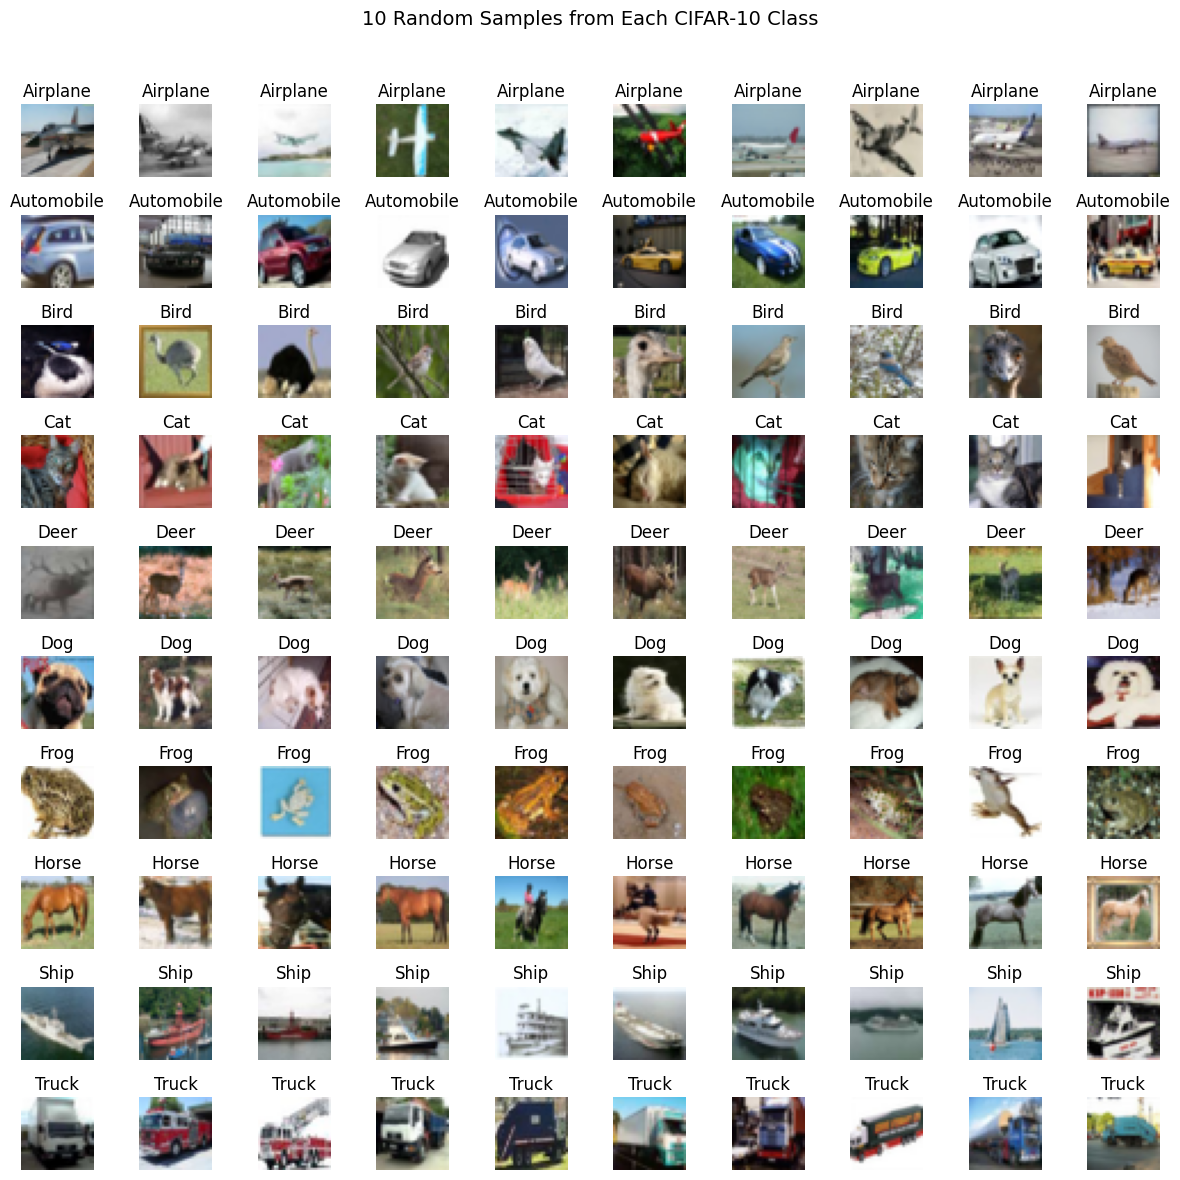

In [14]:
# Your code here :
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer", 
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Visualizing the dataset
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("10 Random Samples from Each CIFAR-10 Class", fontsize=14)

# 10 random samples per class
for class_idx in range(10):
    class_images = x_train[y_train.flatten() == class_idx]
    selected_images = class_images[np.random.choice(class_images.shape[0], 10, replace=False)]
    
    for img_idx in range(10):
        ax = axes[class_idx, img_idx]
        ax.imshow(selected_images[img_idx])
        ax.set_title(class_names[class_idx])
        ax.axis("off")
        
        # Add class label to the first column
        if img_idx == 0:
            ax.set_ylabel(class_names[class_idx], fontsize=10, rotation=90, labelpad=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [15]:
# One-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# Normalizing the images
x_train = x_train / 255.0 # pixels range [0, 1]
x_test = x_test / 255.0

x_train.dtype

dtype('float64')

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [16]:
from keras.backend import clear_session
clear_session()

In [17]:
# Your code here :
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 100)               720100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
__________________________________________________

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [18]:
# Your code here :
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

history = model.fit(x_train, y_train_onehot, batch_size=512, epochs=50)


Epoch 1/50
98/98 [==============================] - 1s 6ms/step - loss: 2.2370 - accuracy: 0.1861
Epoch 2/50
98/98 [==============================] - 1s 6ms/step - loss: 2.0889 - accuracy: 0.2793
Epoch 3/50
98/98 [==============================] - 1s 5ms/step - loss: 1.9812 - accuracy: 0.3104
Epoch 4/50
98/98 [==============================] - 1s 5ms/step - loss: 1.9290 - accuracy: 0.3267
Epoch 5/50
98/98 [==============================] - 1s 6ms/step - loss: 1.8892 - accuracy: 0.3436
Epoch 6/50
98/98 [==============================] - 1s 5ms/step - loss: 1.8608 - accuracy: 0.3532
Epoch 7/50
98/98 [==============================] - 1s 6ms/step - loss: 1.8341 - accuracy: 0.3631
Epoch 8/50
98/98 [==============================] - 1s 5ms/step - loss: 1.8066 - accuracy: 0.3742
Epoch 9/50
98/98 [==============================] - 1s 6ms/step - loss: 1.7862 - accuracy: 0.3811
Epoch 10/50
98/98 [==============================] - 1s 6ms/step - loss: 1.7594 - accuracy: 0.3889
Epoch 11/50
98/98 [

*   Plot the cross entropy loss curve and the accuracy curve

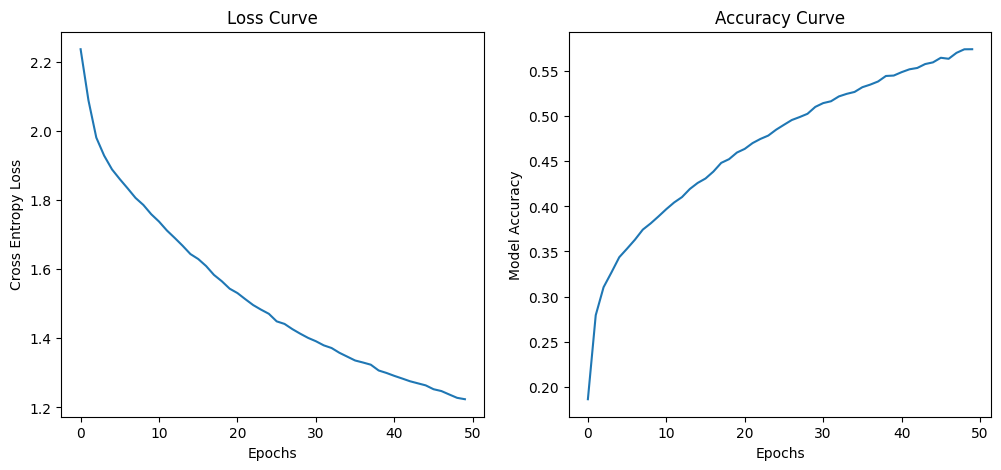

In [19]:
# Your code here :
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.title('Accuracy Curve')

plt.show()


In [20]:
# Test set evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 1.2485 - accuracy: 0.5601
Test Loss: 1.2484662532806396
Test Accuracy: 0.5601000189781189


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [32]:
from keras.backend import clear_session
clear_session()

In [33]:
# Your code here :
vgg_model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32,32,3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [34]:
# Your code here :
vgg_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

vgg_history = vgg_model.fit(x_train, y_train_onehot, batch_size=512, epochs=50)

Epoch 1/50
98/98 [==============================] - 1s 11ms/step - loss: 2.2709 - accuracy: 0.1495
Epoch 2/50
98/98 [==============================] - 1s 11ms/step - loss: 2.1709 - accuracy: 0.2112
Epoch 3/50
98/98 [==============================] - 1s 11ms/step - loss: 2.0603 - accuracy: 0.2584
Epoch 4/50
98/98 [==============================] - 1s 11ms/step - loss: 1.9749 - accuracy: 0.3043
Epoch 5/50
98/98 [==============================] - 1s 11ms/step - loss: 1.9178 - accuracy: 0.3313
Epoch 6/50
98/98 [==============================] - 1s 11ms/step - loss: 1.8633 - accuracy: 0.3485
Epoch 7/50
98/98 [==============================] - 1s 11ms/step - loss: 1.8231 - accuracy: 0.3617
Epoch 8/50
98/98 [==============================] - 1s 11ms/step - loss: 1.7840 - accuracy: 0.3763
Epoch 9/50
98/98 [==============================] - 1s 11ms/step - loss: 1.7479 - accuracy: 0.3877
Epoch 10/50
98/98 [==============================] - 1s 11ms/step - loss: 1.7084 - accuracy: 0.4017
Epoch 11/

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

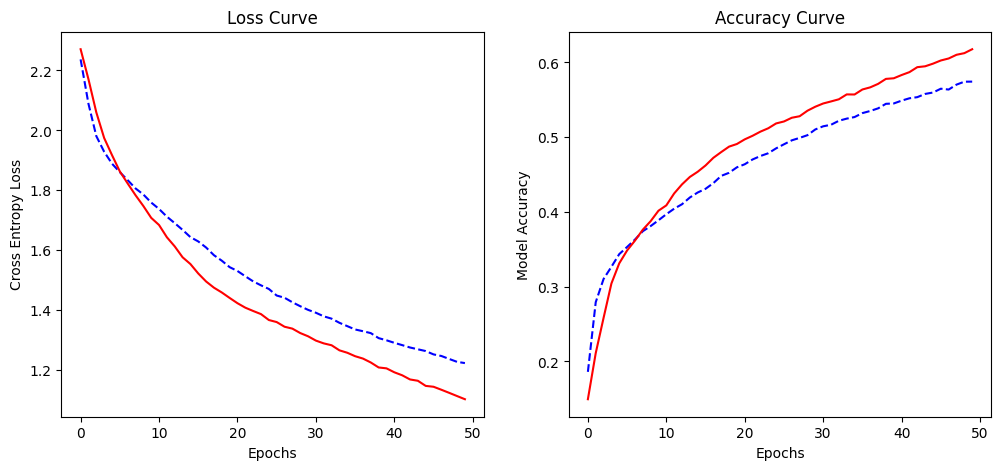

In [35]:
# Your code here :
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Simple Model Loss', color='blue', linestyle='dashed')
plt.plot(vgg_history.history['loss'], label='VGG Model Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Simple Model Accuracy', color='blue', linestyle='dashed')
plt.plot(vgg_history.history['accuracy'], label='VGG Model Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.title('Accuracy Curve')

plt.show()

**Comment on the observation**

The VGG model after 50 epochs predicts more accurately, as well as having less loss compared to the simpler model. This is expected as the VGG model has more convolutional layers and higher numbers of paramaters when compared to the simple model.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [36]:
# Your code here :

y_pred_prob = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

313/313 [==============================] - 0s 1ms/step


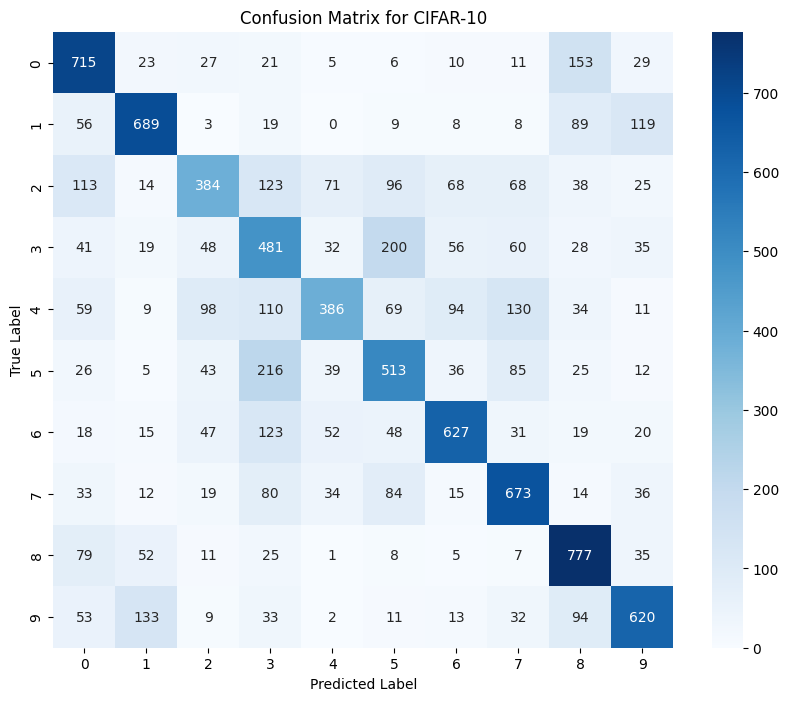

In [37]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

**Comment here :**

From the first look, the model has predicted the majority of the labels correctly. But, when you look closely, you will notice that there are certain classes that the model keeps classifying as another classes. An example of this is the automobile class and the trucks class and the model has confused 231 trucks and classified them as automobiles which is understandable as they share a lot of similarities.   

*    Print the test accuracy for the trained model.

In [38]:
# Your code here :

vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(x_test, y_test_onehot)

print(f"VGG model test accuracy: {vgg_test_accuracy}") # similar to training accuracy, the model generalizes well!

313/313 [==============================] - 1s 3ms/step - loss: 1.1870 - accuracy: 0.5865
VGG model test accuracy: 0.5864999890327454


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [39]:
from keras.backend import clear_session
clear_session()

In [46]:
# resize from 32x32 to 64x64
with tf.device('/CPU:0'):
    x_train_resized = tf.image.resize(x_train, (64,64))
    x_test_resized = tf.image.resize(x_test, (64,64))

In [47]:
# Your code here :
full_vgg_model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(64,64,3)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

full_vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                    

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [48]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [50]:
# Your code here :

full_vgg_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

full_vgg_history = full_vgg_model.fit(x_train_resized, y_train_onehot, batch_size=512, epochs=50) # I can do 10 but why not 50 :)

Epoch 1/50
98/98 [==============================] - 15s 150ms/step - loss: 2.2242 - accuracy: 0.2021
Epoch 2/50
98/98 [==============================] - 15s 149ms/step - loss: 2.1308 - accuracy: 0.2166
Epoch 3/50
98/98 [==============================] - 15s 149ms/step - loss: 2.0489 - accuracy: 0.2563
Epoch 4/50
98/98 [==============================] - 15s 149ms/step - loss: 1.9967 - accuracy: 0.2765
Epoch 5/50
98/98 [==============================] - 15s 149ms/step - loss: 1.9527 - accuracy: 0.2967
Epoch 6/50
98/98 [==============================] - 15s 149ms/step - loss: 1.9197 - accuracy: 0.3120
Epoch 7/50
98/98 [==============================] - 15s 149ms/step - loss: 1.8759 - accuracy: 0.3268
Epoch 8/50
98/98 [==============================] - 15s 149ms/step - loss: 1.8341 - accuracy: 0.3464
Epoch 9/50
98/98 [==============================] - 15s 149ms/step - loss: 1.8012 - accuracy: 0.3576
Epoch 10/50
98/98 [==============================] - 15s 149ms/step - loss: 1.7533 - accura

In [55]:
full_vgg_loss, full_vgg_accuracy = full_vgg_model.evaluate(x_test_resized, y_test_onehot)

313/313 [==============================] - 2s 5ms/step - loss: 1.2676 - accuracy: 0.5642


In [53]:
y_pred_prob_full = full_vgg_model.predict(x_test_resized)
y_pred_classes_full = np.argmax(y_pred_prob_full, axis=1)

313/313 [==============================] - 2s 4ms/step


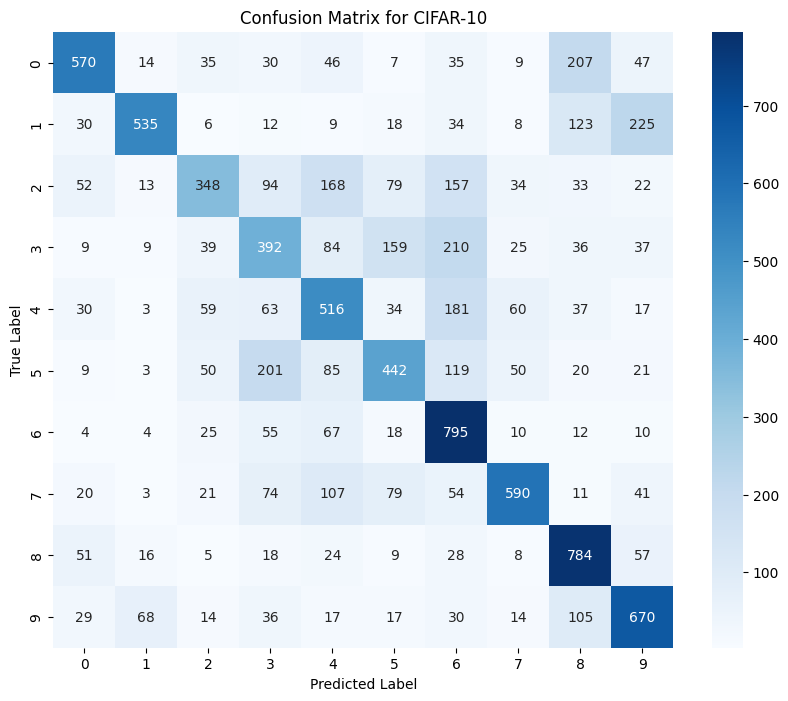

In [56]:
cm_full = confusion_matrix(y_true_classes, y_pred_classes_full)

plt.figure(figsize=(10, 8))
heatmap(cm_full, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CIFAR-10")
plt.show()

**Comments on the confusion matrix**

The confusion matrix of full VGG model is interesting. While some classes appear to have worse predictions, other classes have significantly better classification thanks to the multiple convolutional layers.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions help a neural network learn complex patterns by introducing non-linearity. They decide whether a neuron should be "activated" or not, helping the network make better predictions.


2 - Key Differences between sigmoid and softmax:

Sigmoid and softmax are both activation functions, but they are used in different situations. Sigmoid takes an input and squashes it between 0 and 1, making it useful for binary classification, where you need to decide between two options (like "yes" or "no").

Softmax, on the other hand, is used for multi-class classification. It also converts inputs into values between 0 and 1, but it does so in a way that ensures all outputs add up to 1. This makes it useful when you need to assign probabilities to multiple categories, such as classifying an image as either a cat, dog, or horse. Unlike sigmoid, softmax makes sure that increasing the probability of one class decreases the probability of others, making the predictions more interpretable.


3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is used for binary classification, where the output is either 0 or 1 (such as spam vs. not spam). It calculates the difference between the actual label and the predicted probability for a single class.

Categorical crossentropy is used for multi-class classification, where the output has multiple possible categories (such as classifying an image as a cat, dog, or horse). Instead of just one probability, it considers multiple class probabilities and penalizes incorrect predictions accordingly. If the labels are one-hot encoded (only one class is 1 while the rest are 0), categorical crossentropy works perfectly.
